In [2]:
# Kidney Disease Prediction Using Logistic Regression
In this project, we use machine learning to predict chronic kidney disease (CKD) using a dataset of patient information. The objective is to build a classification model to assist in early detection.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv(r"C:\Users\acer\Desktop\Chro_Kid Pro\archive\kidney_disease.csv")

In [5]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
pd.options.display.float_format='{:,.2f}'.format
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.00,391.00,388.00,353.00,354.00,351.00,356.00,381.00,383.00,313.00,312.00,348.00
mean,199.50,51.48,76.47,1.02,1.02,0.45,148.04,57.43,3.07,137.53,4.63,12.53
std,115.61,17.17,13.68,0.01,1.35,1.10,79.28,50.50,5.74,10.41,3.19,2.91
min,0.00,2.00,50.00,1.00,0.00,0.00,22.00,1.50,0.40,4.50,2.50,3.10
25%,99.75,42.00,70.00,1.01,0.00,0.00,99.00,27.00,0.90,135.00,3.80,10.30
50%,199.50,55.00,80.00,1.02,0.00,0.00,121.00,42.00,1.30,138.00,4.40,12.65
75%,299.25,64.50,80.00,1.02,2.00,0.00,163.00,66.00,2.80,142.00,4.90,15.00
max,399.00,90.00,180.00,1.02,5.00,5.00,490.00,391.00,76.00,163.00,47.00,17.80


In [8]:
data.isnull ().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 49
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

In [11]:
data= data.drop(data.columns[[0, 1]],axis = 1)

# DATA CLEANING

In [12]:

data.replace('NAN', pd.NA, inplace=True)

# Convert necessary columns to numeric
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

# Drop rows with missing values
data_cleaned = data.dropna()

# Inspect cleaned data
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              159 non-null    float64
 1   sg              159 non-null    float64
 2   al              159 non-null    float64
 3   su              159 non-null    float64
 4   rbc             159 non-null    object 
 5   pc              159 non-null    object 
 6   pcc             159 non-null    object 
 7   ba              159 non-null    object 
 8   bgr             159 non-null    float64
 9   bu              159 non-null    float64
 10  sc              159 non-null    float64
 11  sod             159 non-null    float64
 12  pot             159 non-null    float64
 13  hemo            159 non-null    float64
 14  pcv             159 non-null    float64
 15  wc              159 non-null    float64
 16  rc              159 non-null    float64
 17  htn             159 non-null    object 


# Analysis📝 & Visualiation📊

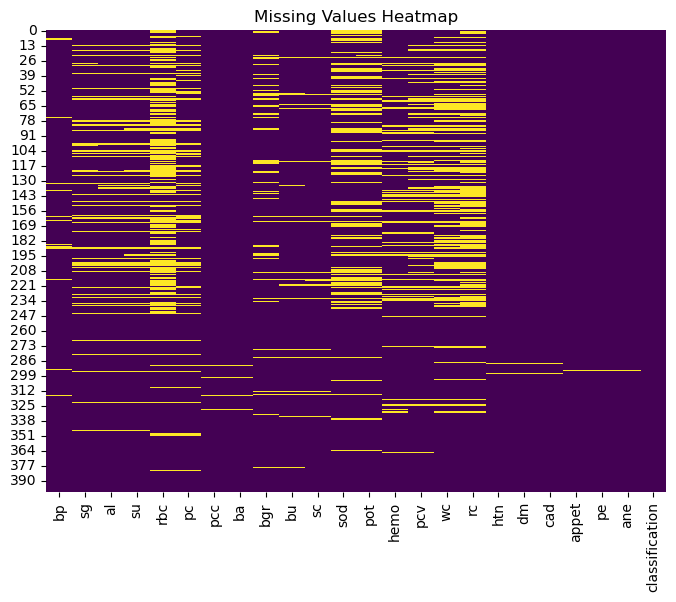

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [21]:
cor= data.select_dtypes(exclude=object).corr()
cor

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
bp,1.00,-0.22,0.16,0.22,0.16,0.19,0.15,-0.12,0.08,-0.31,-0.33,0.03,-0.26
sg,-0.22,1.00,-0.47,-0.30,-0.37,-0.31,-0.36,0.41,-0.07,0.60,0.60,-0.24,0.58
al,0.16,-0.47,1.00,0.27,0.38,0.45,0.40,-0.46,0.13,-0.63,-0.61,0.23,-0.57
su,0.22,-0.30,0.27,1.00,0.72,0.17,0.22,-0.13,0.22,-0.22,-0.24,0.18,-0.24
bgr,0.16,-0.37,0.38,0.72,1.00,0.14,0.11,-0.27,0.07,-0.31,-0.30,0.15,-0.28
bu,0.19,-0.31,0.45,0.17,0.14,1.00,0.59,-0.32,0.36,-0.61,-0.61,0.05,-0.58
sc,0.15,-0.36,0.40,0.22,0.11,0.59,1.00,-0.69,0.33,-0.40,-0.40,-0.01,-0.40
sod,-0.12,0.41,-0.46,-0.13,-0.27,-0.32,-0.69,1.00,0.10,0.37,0.38,0.01,0.34
pot,0.08,-0.07,0.13,0.22,0.07,0.36,0.33,0.10,1.00,-0.13,-0.16,-0.11,-0.16
hemo,-0.31,0.60,-0.63,-0.22,-0.31,-0.61,-0.40,0.37,-0.13,1.00,0.90,-0.17,0.80


In [24]:
data_clean=pd.read_csv(r"C:\Users\acer\Desktop\Chro_Kid Pro\archive\kidney_disease.csv")

In [25]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


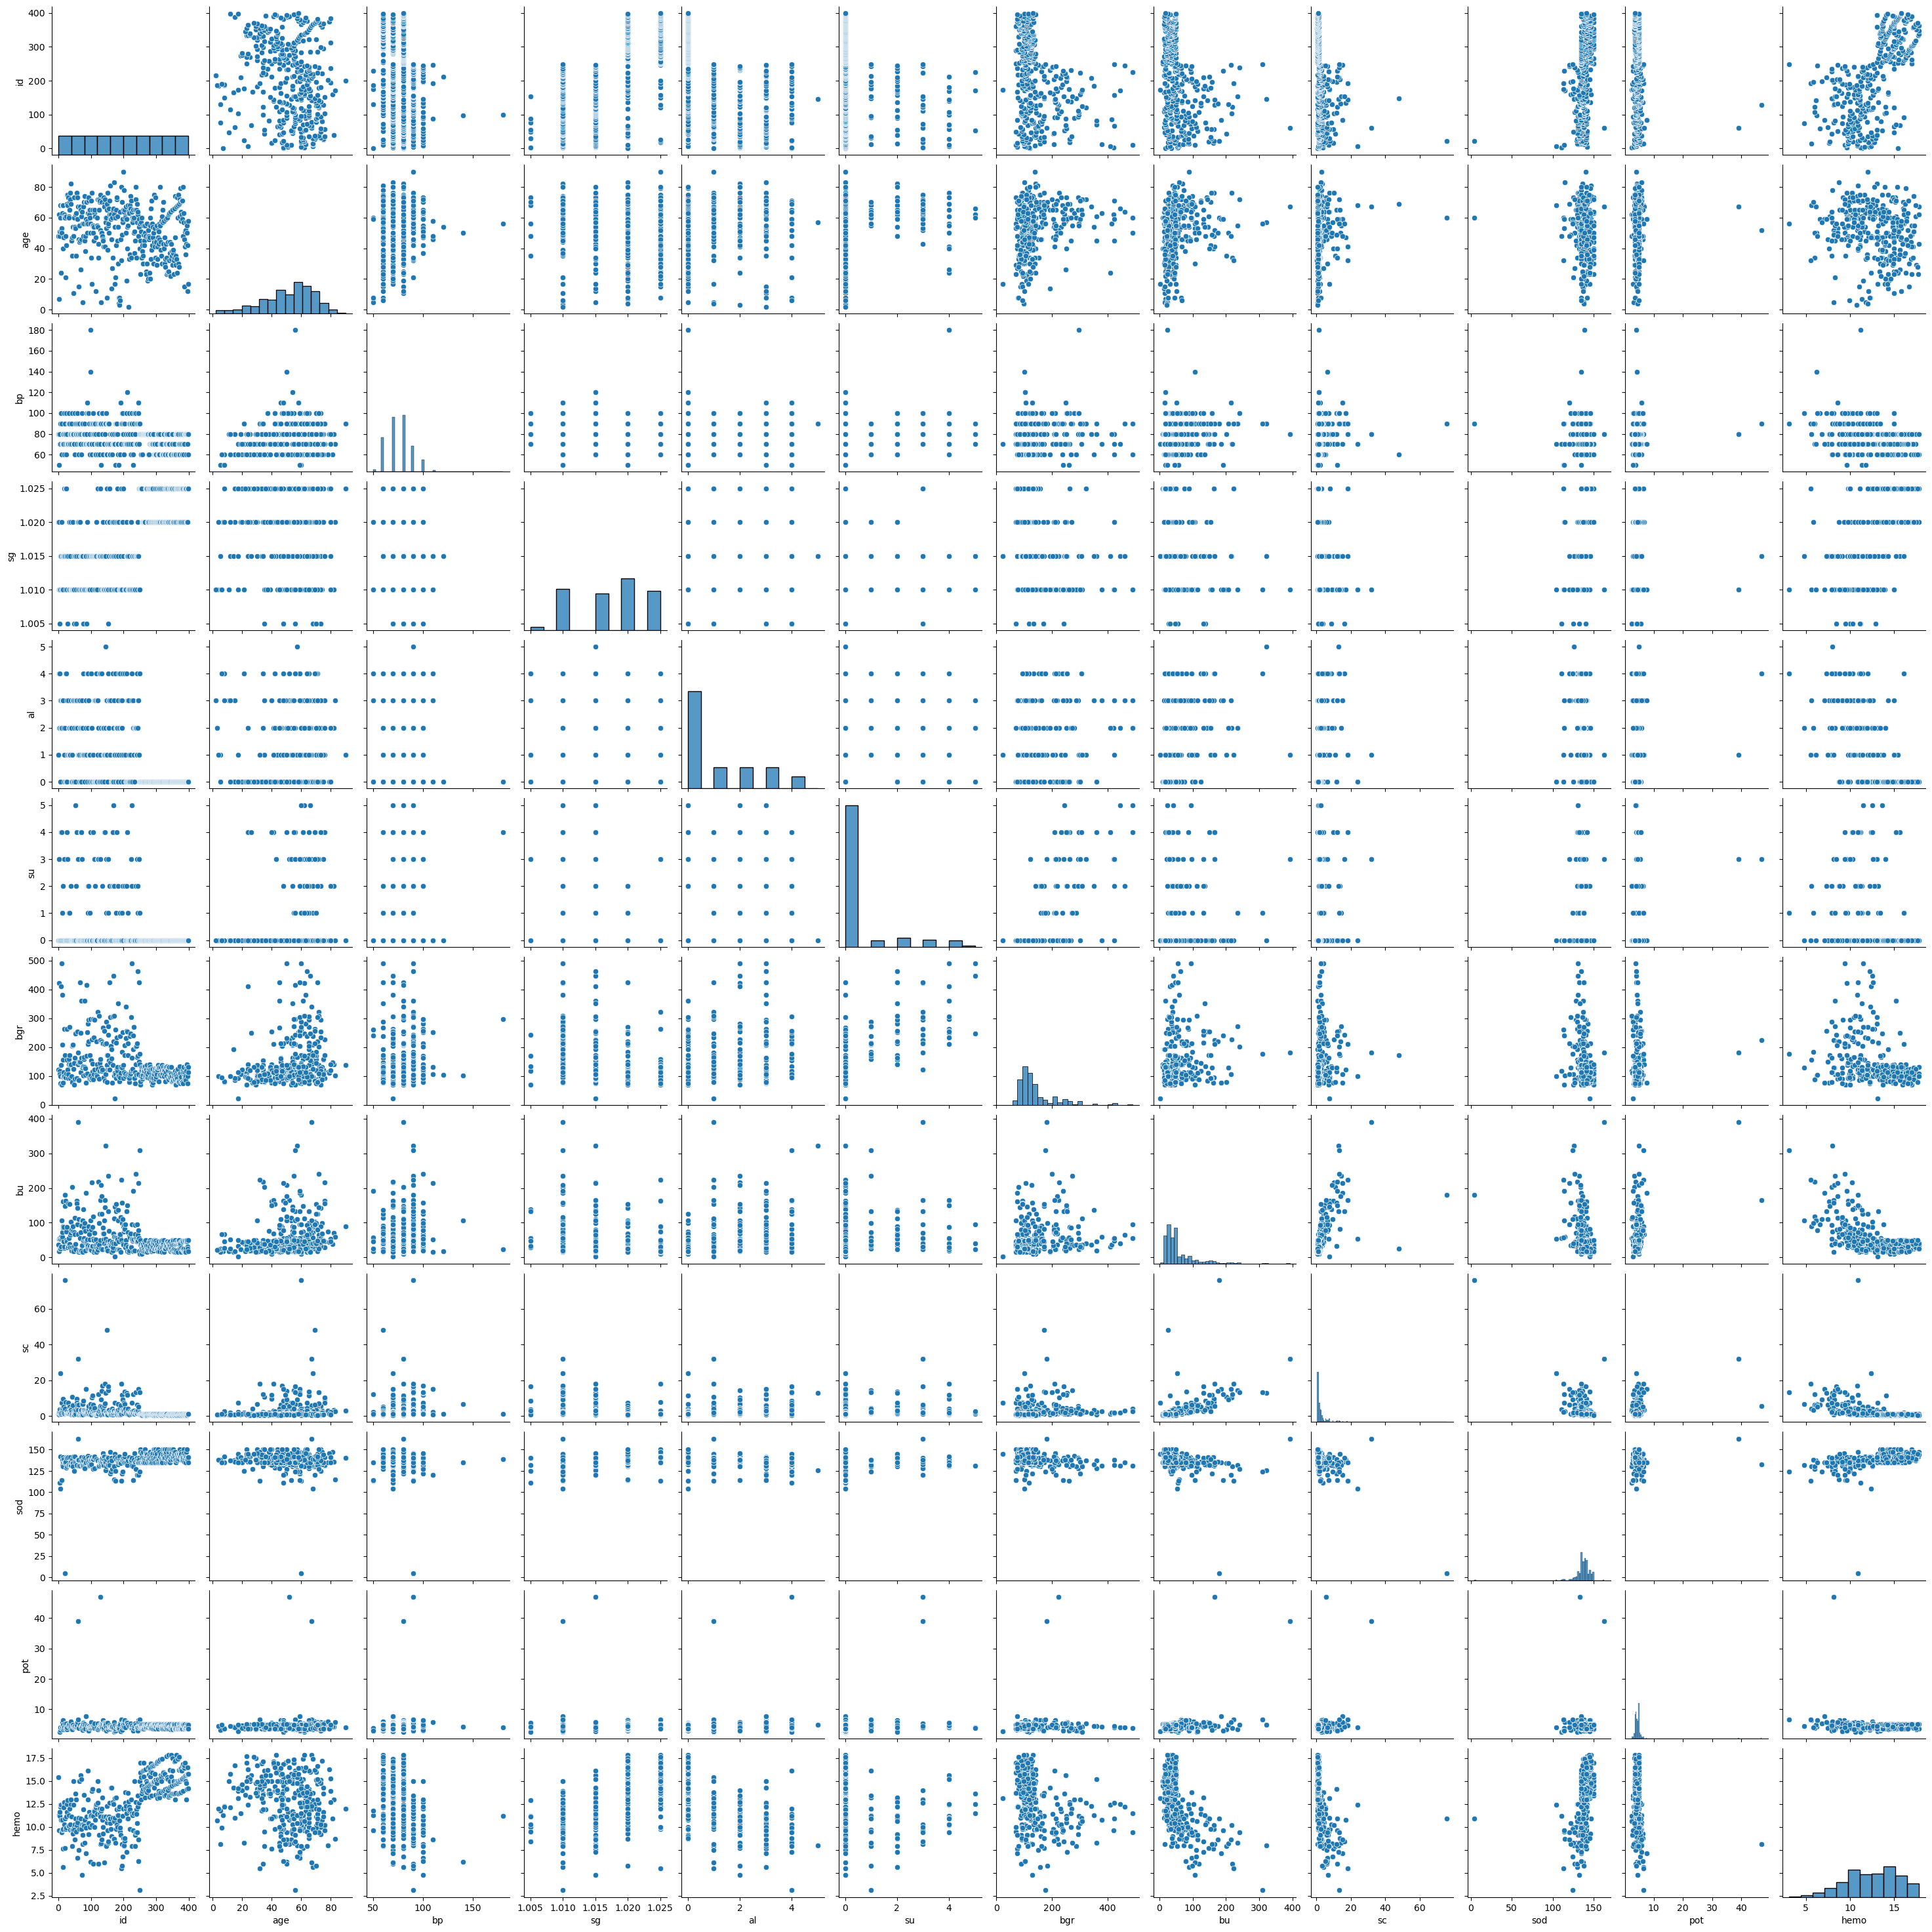

In [26]:
sns.pairplot(data_clean)

In [30]:
from sklearn import preprocessing
encode_data = data_clean.apply(preprocessing.LabelEncoder().fit_transform)
encode_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,5,0,3,4,0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,2
396,396,34,2,4,0,0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,2
397,397,8,3,3,0,0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,2
398,398,11,1,4,0,0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,2


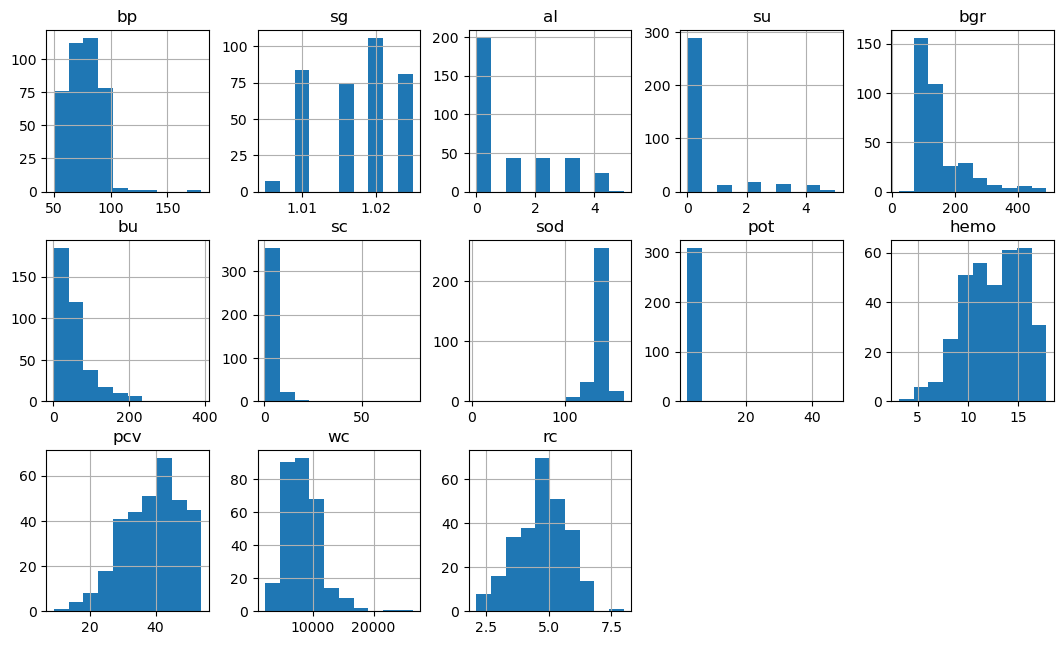

In [31]:
data.hist(figsize=(13,13),layout=(5,5))
plt.show()

In [32]:
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [33]:
# Handling missing values by filling them with the mean of the column
data.fillna(data.mean(numeric_only=True), inplace=True)

In [34]:
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


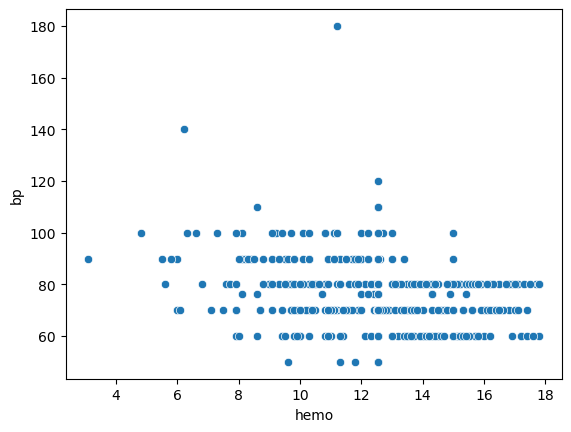

In [35]:
sns.scatterplot(x='hemo', y='bp', data=data) 
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_8408\1946113149.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_cols, i + 1)  # Dynamically create subplots based on the number of features


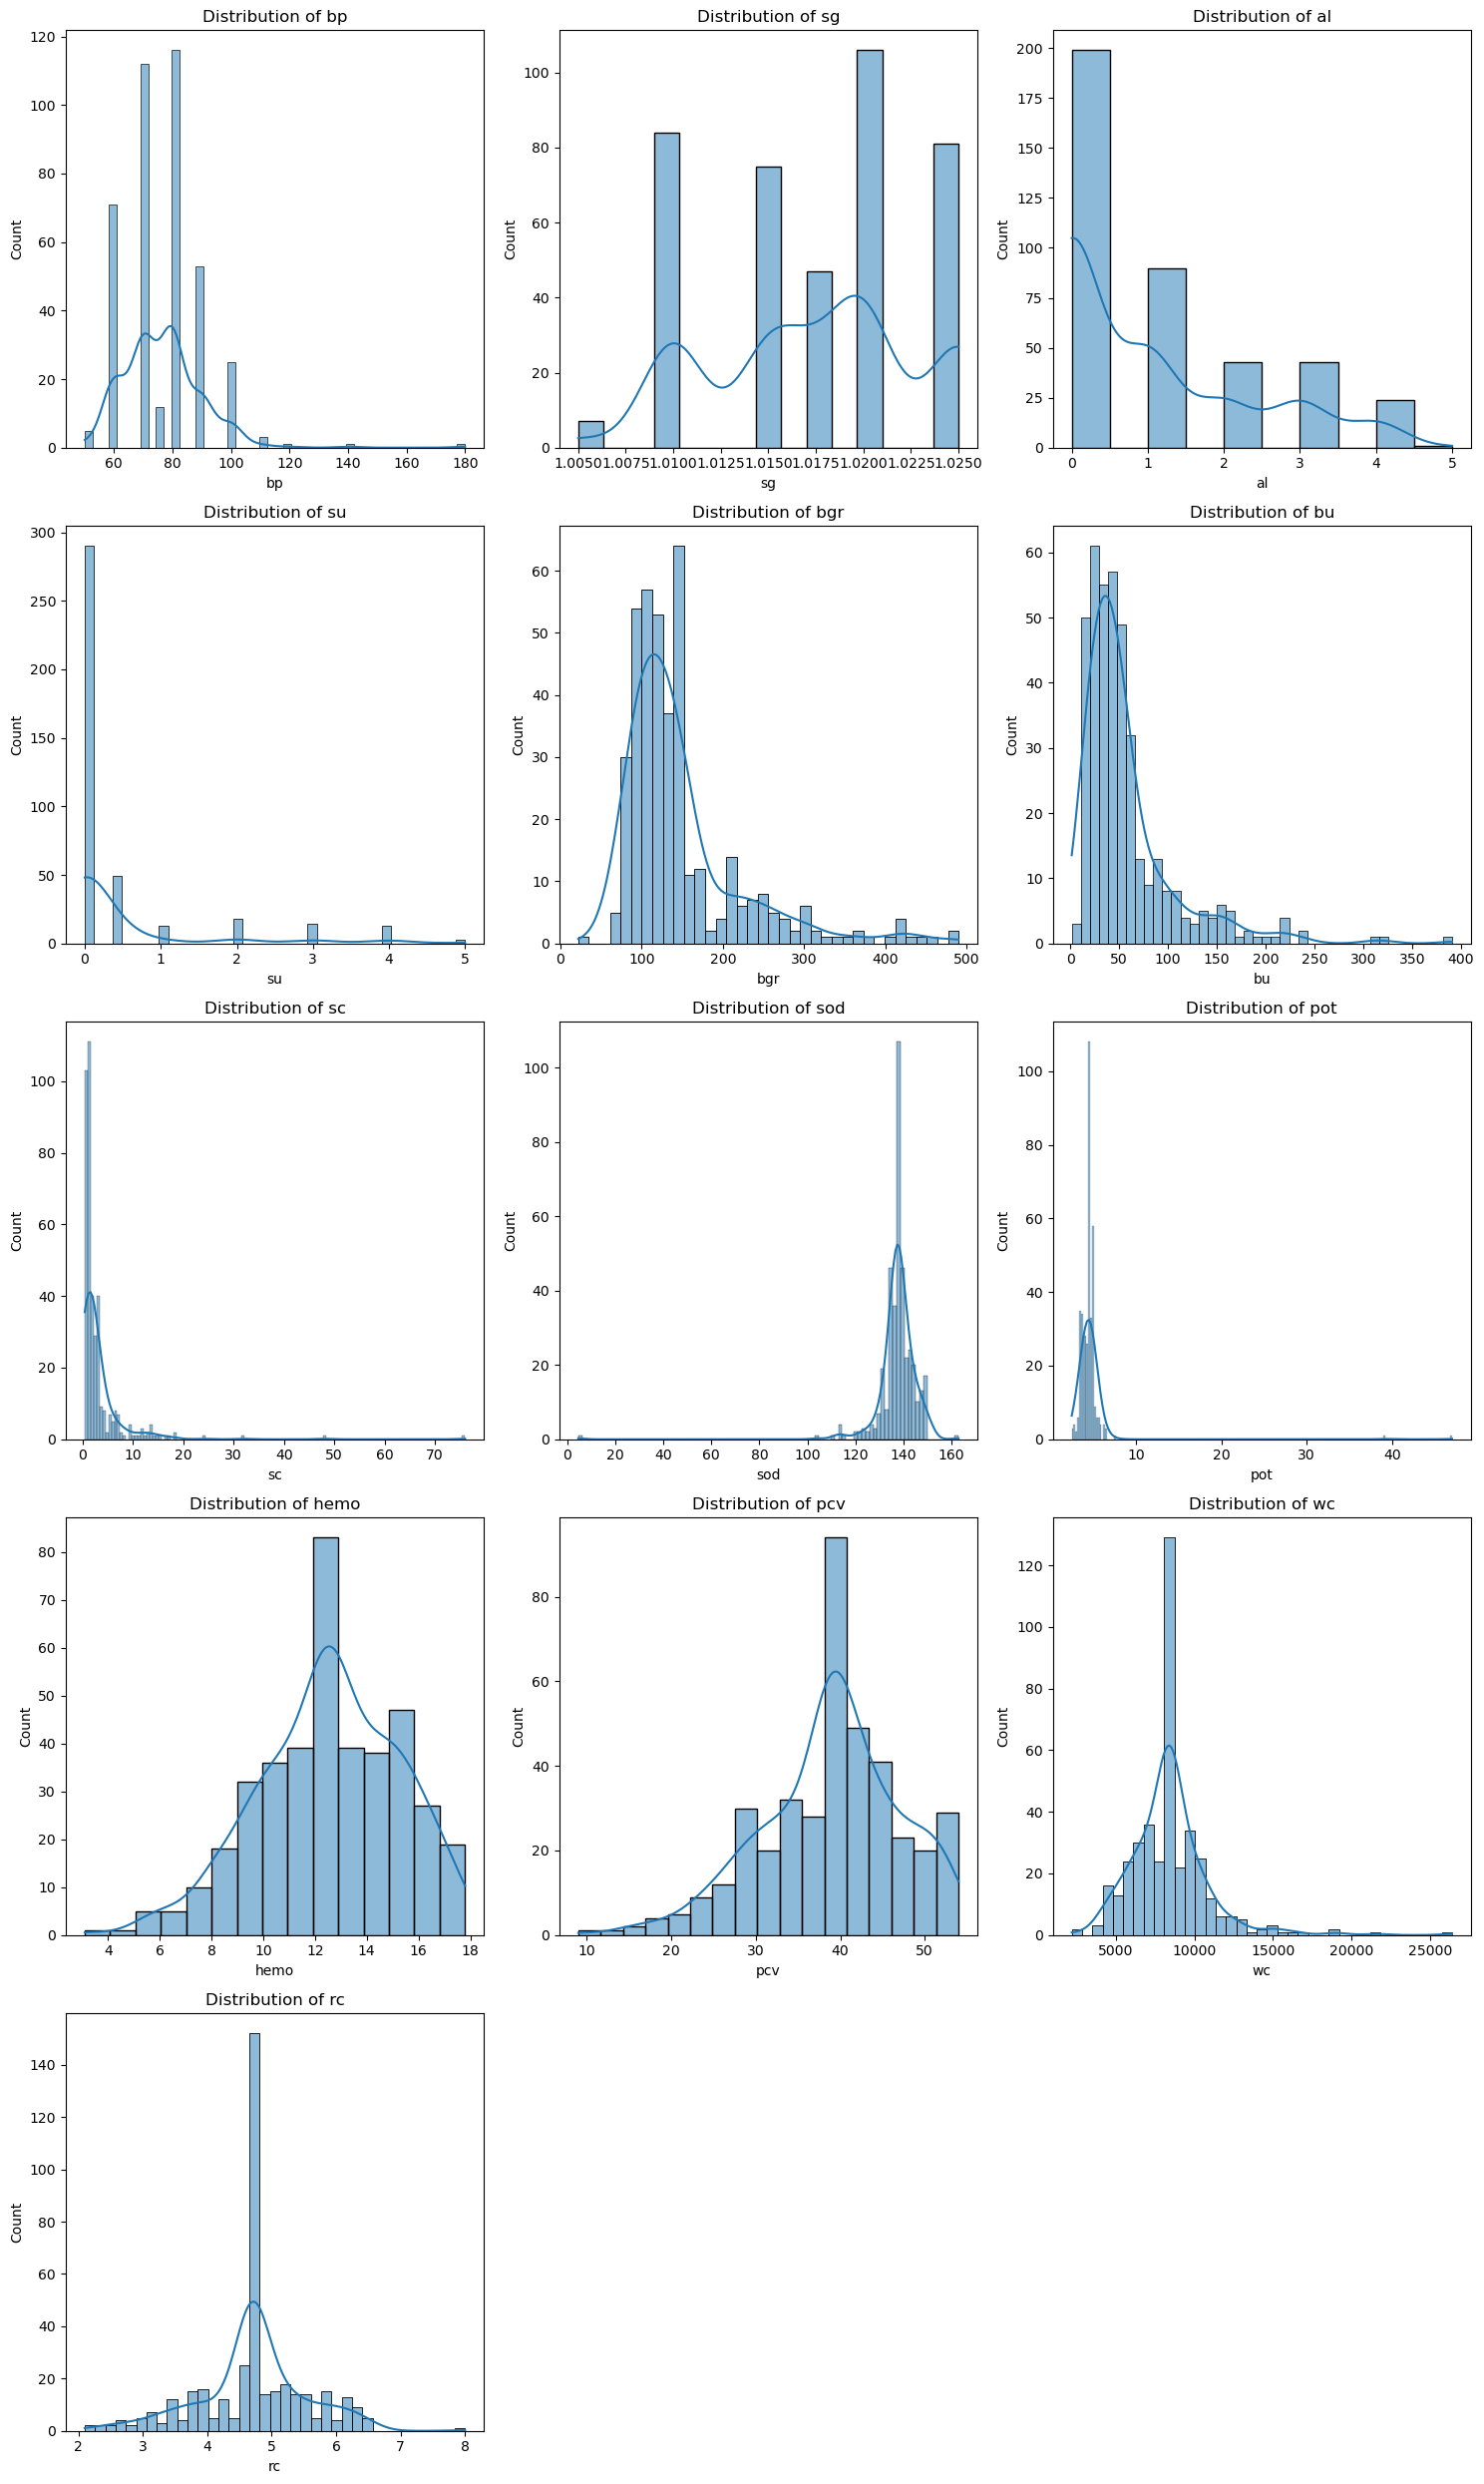

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select columns with float data types
features = data.select_dtypes(include='float').columns

# Calculate the number of rows and columns required
n_cols = 3  # You can adjust the number of columns as needed
n_rows = math.ceil(len(features) / n_cols)

# Create a subplot with specified figure size
plt.subplots(figsize=(15, 5 * n_rows))

# Iterate through each float-type column
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically create subplots based on the number of features
    sns.histplot(data[col], kde=True)   # Use histplot with KDE for better visualization
    plt.title(f"Distribution of {col}") # Optional: Add title for each subplot

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


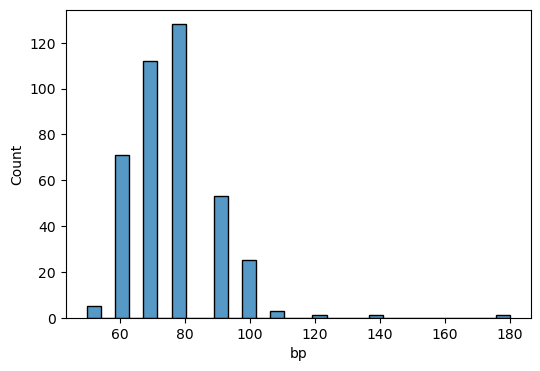

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(data.bp, bins=30)
plt.show()

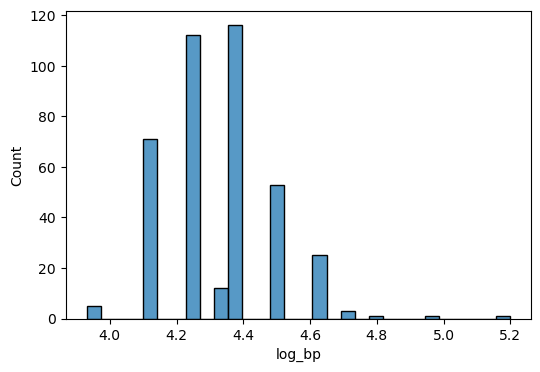

In [38]:
data['log_bp'] = np.log1p(data.bp)
plt.figure(figsize=(6, 4))
sns.histplot(data.log_bp, bins=30)

plt.show()

In [39]:
data.bp.skew()

1.629875965898943

In [40]:
data.log_bp.skew()

0.45018819374846714

C:\Users\acer\AppData\Local\Temp\ipykernel_8408\38078282.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


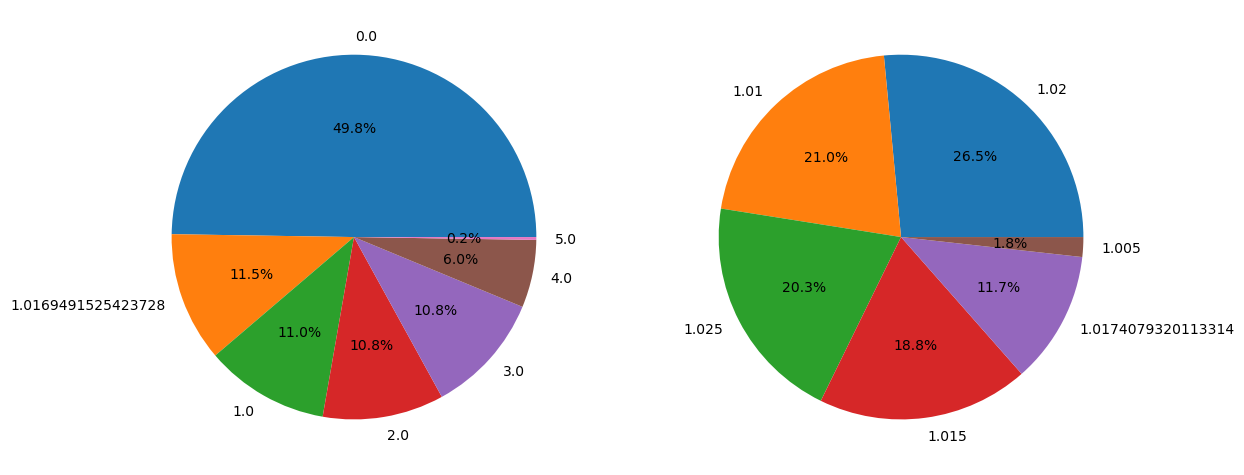

In [41]:
import matplotlib.pyplot as plt
features = ['al', 'sg']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

<Axes: >

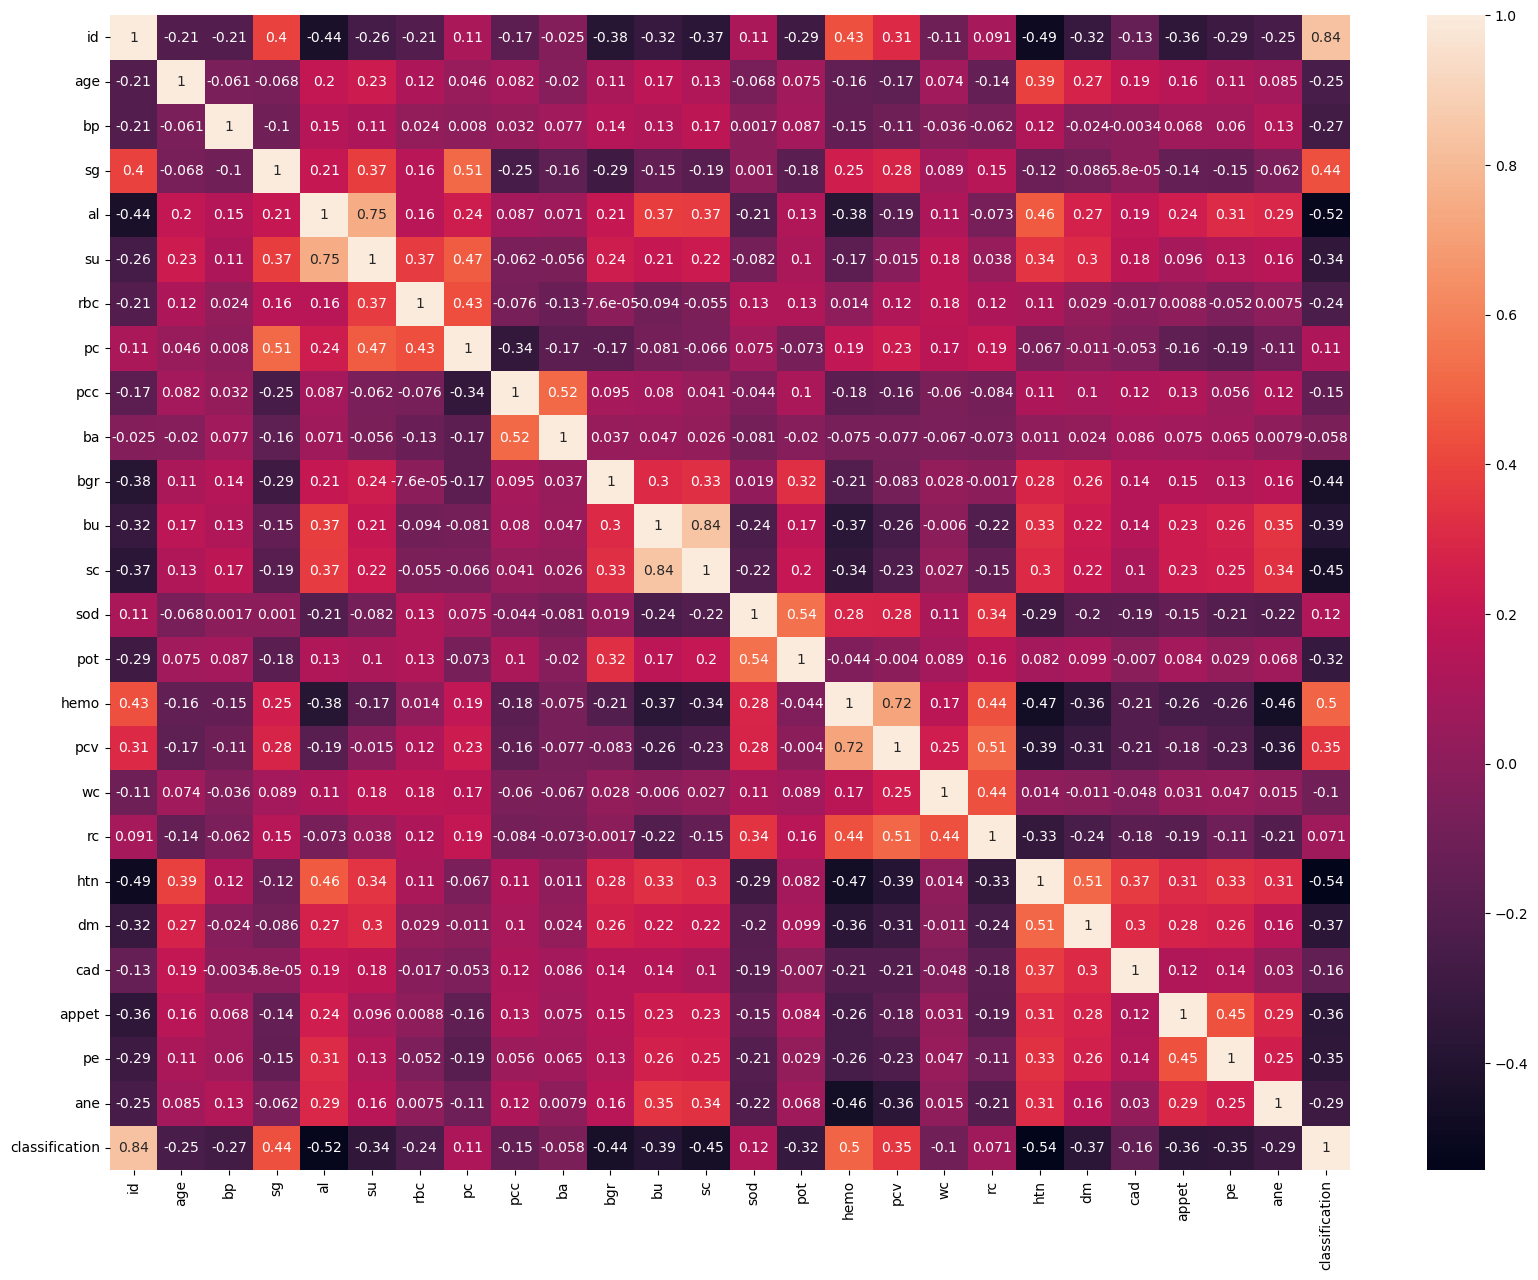

In [42]:
plt.figure(figsize=(20,15))
corr = encode_data.corr()
sns.heatmap(corr, annot = True)

In [43]:
np.random.seed(2)     # Fixes the random seed to make sure that the results are reproducible

n = len(data) 

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print('No. of rows for training : ', n_train)
print('No. of rows for validation : ', n_val)
print('No. of rows for testing : ', n_test)

No. of rows for training :  240
No. of rows for validation :  80
No. of rows for testing :  80


In [44]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [45]:
data_shuffled = data.iloc[idx]
print(data.index)
print(data_shuffled.index)

RangeIndex(start=0, stop=400, step=1)
Index([ 94,  32, 225, 157, 356,  25,  67, 189, 304, 226,
       ...
        95, 162, 263, 360,  75, 299,  22,  72,  15, 168],
      dtype='int64', length=400)


In [46]:
data_shuffled

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,...,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,log_bp
94,70.00,1.01,0.00,0.00,93.00,66.00,1.60,137.00,4.50,11.60,...,False,False,False,True,True,False,False,False,False,4.26
32,90.00,1.01,1.00,1.00,159.00,39.00,1.50,133.00,4.90,11.30,...,False,False,False,True,True,False,True,False,False,4.51
225,90.00,1.01,3.00,5.00,490.00,95.00,2.70,131.00,3.80,11.50,...,False,False,False,True,True,False,False,False,False,4.51
157,70.00,1.02,3.00,0.00,122.00,42.00,1.70,136.00,4.70,12.60,...,False,False,False,True,True,False,False,False,False,4.26
356,70.00,1.02,0.00,0.00,87.00,38.00,0.50,144.00,4.80,17.10,...,False,False,True,False,True,False,False,False,False,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,60.00,1.02,0.00,0.00,127.00,48.00,0.50,150.00,3.50,15.10,...,False,False,True,False,True,False,False,False,False,4.11
22,80.00,1.02,4.00,0.00,95.00,163.00,7.70,136.00,3.80,9.80,...,False,False,True,False,True,False,False,False,True,4.39
72,90.00,1.01,3.00,3.00,148.04,35.00,1.30,137.53,4.63,10.30,...,False,False,False,True,True,False,False,True,False,4.51
15,80.00,1.01,3.00,0.00,76.00,162.00,9.60,141.00,4.90,7.60,...,False,False,True,False,True,False,False,False,True,4.39


In [47]:
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [48]:
data_train.shape

(240, 29)

In [49]:
data_val.shape

(80, 29)

In [50]:
data_test.shape

(80, 29)

# Feature Selection 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
X = data.drop(columns=[ 'classification'])
y = data['classification'].apply(lambda x: 1 if x == 'ckd' else 0)  # Convert target to binary


In [59]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)

In [60]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [61]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 98.75%
Confusion Matrix:
[[27  1]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



ValueError: could not convert string to float: 'ckd'

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>